# Project overview

## What problem do you solve?

This project addresses the challenge of predicting the onset of diabetes in patients based on specific health measurements. Using the [Diabetes Factor Dataset on Kaggle](https://www.kaggle.com/datasets/joebeachcapital/diabetes-factors) (Joakim Arvidsson, 2023), we aim to build a machine learning model that can accurately classify whether a patient has diabetes or not, which could serve as an early warning tool for healthcare professionals.


## What ML approach do you use?

We use a supervised machine learning approach for this binary classification task. The primary methods explored are:

1. Support Vector Machine (SVM): We begin with a simple linear SVM to establish a baseline and then systematically search for the best model by tuning hyperparameters (like `kernel`, `C`, and `gamma`) using `GridSearchCV`.
2. Random Forest Classifier: To compare performance, we also implement and tune a Random Forest, another powerful ensemble learning method. Random Forest also gives insights on which features are important to predict the outcome.

The process includes essential data preprocessing steps such as dropping outliears, scaling features and model evaluation using 5-fold cross-validation to ensure our results are reliable.

## Prerequisites

To run the following code cell and download the dataset from Kaggle, you need to have a Kaggle API key. Please follow these steps:

1.  If you don't have a Kaggle account, sign up on the [Kaggle](https://www.kaggle.com/).
2.  Generate an API token: Go to your Kaggle account settings, scroll down to the "API" section, and click on "Create New API Token". This will download a file named `kaggle.json` to your computer.
3.  Upload the `kaggle.json` file to your Colab environment: In the Colab file browser (the folder icon on the left sidebar), click on the "Upload to session storage" icon and select the `kaggle.json` file you just downloaded. Make sure it is uploaded to the `/content/` directory.

Once the `kaggle.json` file is in the `/content/` directory, you can run the next code cell.

To understand diabetes begins with the "Diabetes Factors" dataset, a rich collection of health metrics that can potentially reveal patterns associated with diabetes outcomes. The dataset, conveniently downloaded from Kaggle, provides us with crucial information about patients, including factors like pregnancies, glucose levels, blood pressure, and BMI, alongside their diabetes 'Outcome' (alive or dead).

Our first step is to load this data and get a preliminary understanding of its structure and content.

In [14]:
import os
import sys

!mkdir -p ~/.kaggle

# Check if kaggle.json exists in /content/ before attempting to copy it
if os.path.exists('/content/kaggle.json'):
    !cp /content/kaggle.json ~/.kaggle/
    !chmod 600 ~/.kaggle/kaggle.json
else:
    sys.exit("kaggle.json not found in /content/. Please upload your kaggle.json file.")

# Download and unzip the dataset from Kaggle
!kaggle datasets download -d joebeachcapital/diabetes-factors
!unzip -o diabetes-factors.zip

# Check the downloaded data
!ls -l
!head diabetes-vid.csv

Dataset URL: https://www.kaggle.com/datasets/joebeachcapital/diabetes-factors
License(s): DbCL-1.0
diabetes-factors.zip: Skipping, found more recently modified local copy (use --force to force download)
Archive:  diabetes-factors.zip
  inflating: diabetes-vid.csv        
total 48
-rw-r--r-- 1 root root  9447 Aug  7  2023 diabetes-factors.zip
-rw-r--r-- 1 root root 26682 Aug  7  2023 diabetes-vid.csv
-rw-r--r-- 1 root root    63 Sep 20 04:23 kaggle.json
drwxr-xr-x 1 root root  4096 Sep 16 13:40 sample_data
﻿Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
6,148,72,35,0,33.6,0.627,50,dead
1,85,66,29,0,26.6,0.351,31,alive
8,183,64,0,0,23.3,0.672,32,dead
1,89,66,23,94,28.1,0.167,21,alive
0,137,40,35,168,43.1,2.288,33,dead
5,116,74,0,0,25.6,0.201,30,alive
3,78,50,32,88,31,0.248,26,dead
10,115,0,0,0,35.3,0.134,29,alive
2,197,70,45,543,30.5,0.158,53,dead


# Analyze features

Plot all combinations of features from the CSV file "diabetes-vid.csv" to visualize their relationship with the 'Outcome' column, to help determine which feature combinations would be best for demonstrating SVM classification.

To do that, I'd identify the columns that contain numerical data suitable for plotting.


In [15]:
import pandas as pd
from itertools import combinations

df = pd.read_csv('diabetes-vid.csv')
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    object 
dtypes: float64(2), int64(6), object(1)
memory usage: 54.1+ KB


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,dead
1,1,85,66,29,0,26.6,0.351,31,alive
2,8,183,64,0,0,23.3,0.672,32,dead
3,1,89,66,23,94,28.1,0.167,21,alive
4,0,137,40,35,168,43.1,2.288,33,dead


In [16]:
print("\n=========== Identify features of the data ============\n")

numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
feature_combinations = list(combinations(numerical_cols, 2))

print(feature_combinations)


=========== Identify features of the data ============

[('Pregnancies', 'Glucose'), ('Pregnancies', 'BloodPressure'), ('Pregnancies', 'SkinThickness'), ('Pregnancies', 'Insulin'), ('Pregnancies', 'BMI'), ('Pregnancies', 'DiabetesPedigreeFunction'), ('Pregnancies', 'Age'), ('Glucose', 'BloodPressure'), ('Glucose', 'SkinThickness'), ('Glucose', 'Insulin'), ('Glucose', 'BMI'), ('Glucose', 'DiabetesPedigreeFunction'), ('Glucose', 'Age'), ('BloodPressure', 'SkinThickness'), ('BloodPressure', 'Insulin'), ('BloodPressure', 'BMI'), ('BloodPressure', 'DiabetesPedigreeFunction'), ('BloodPressure', 'Age'), ('SkinThickness', 'Insulin'), ('SkinThickness', 'BMI'), ('SkinThickness', 'DiabetesPedigreeFunction'), ('SkinThickness', 'Age'), ('Insulin', 'BMI'), ('Insulin', 'DiabetesPedigreeFunction'), ('Insulin', 'Age'), ('BMI', 'DiabetesPedigreeFunction'), ('BMI', 'Age'), ('DiabetesPedigreeFunction', 'Age')]


Then, for each feature pair, generate a scatter plot where points are colored based on the 'Outcome' column.


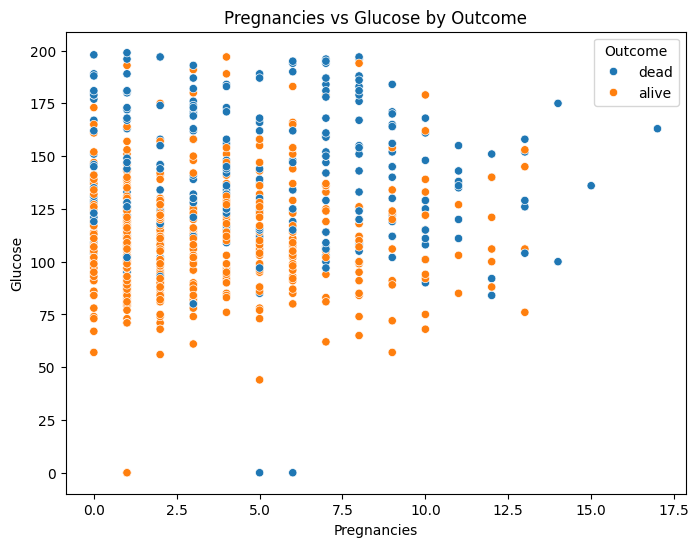

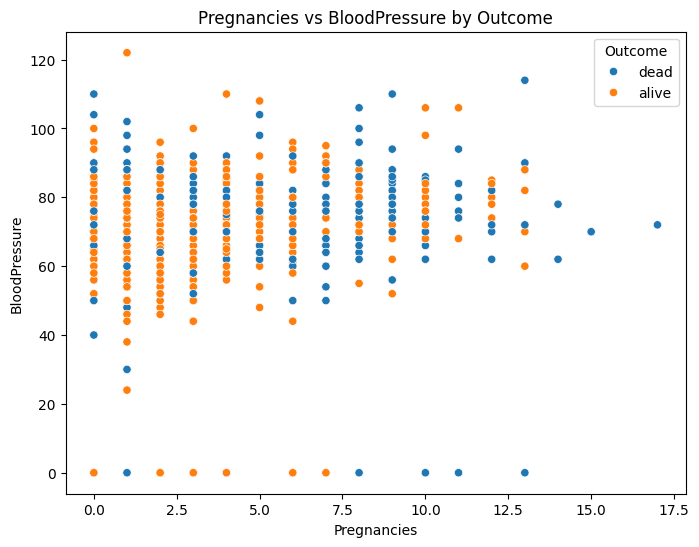

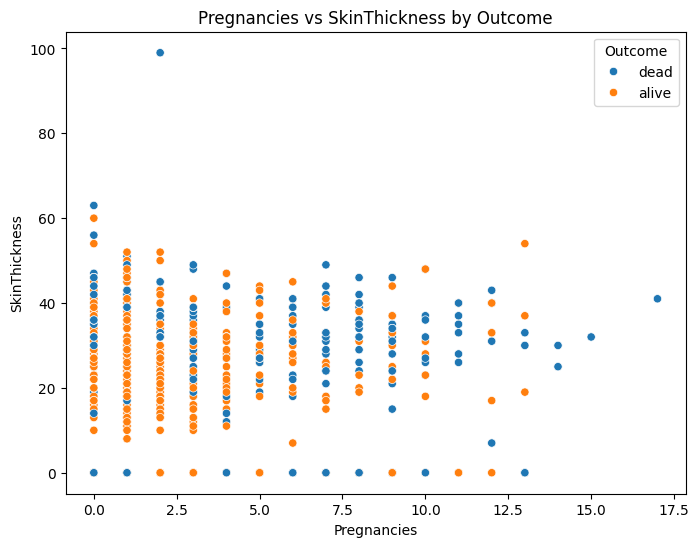

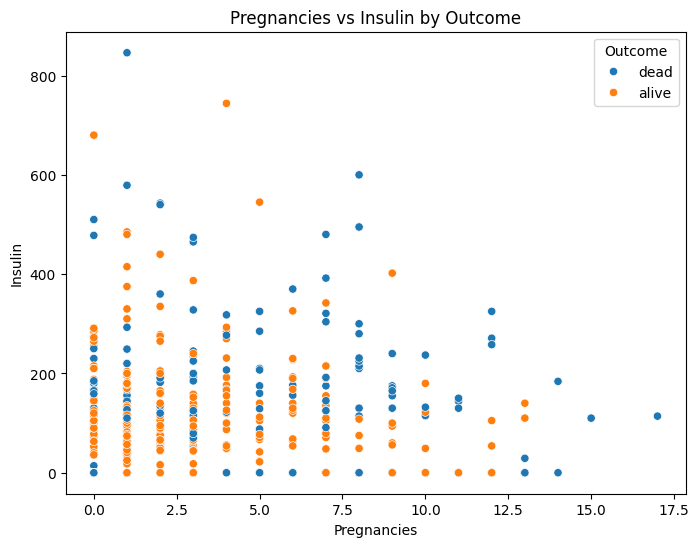

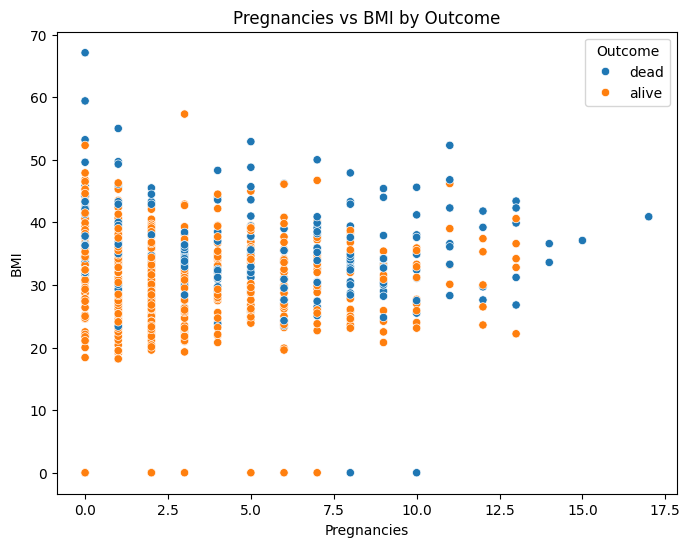

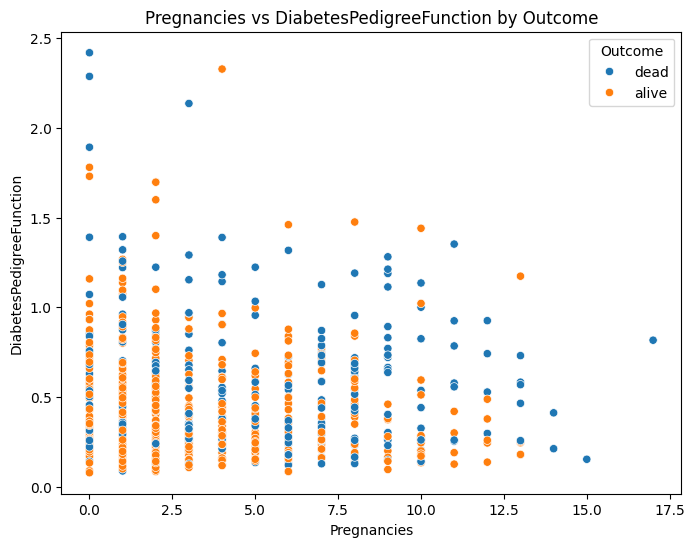

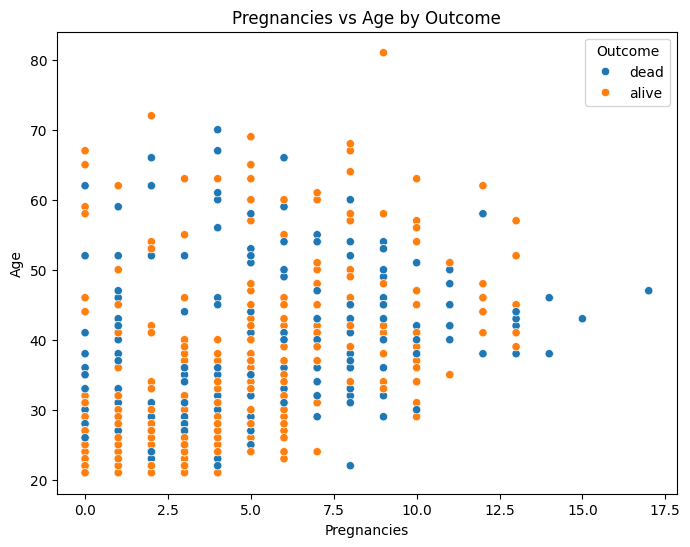

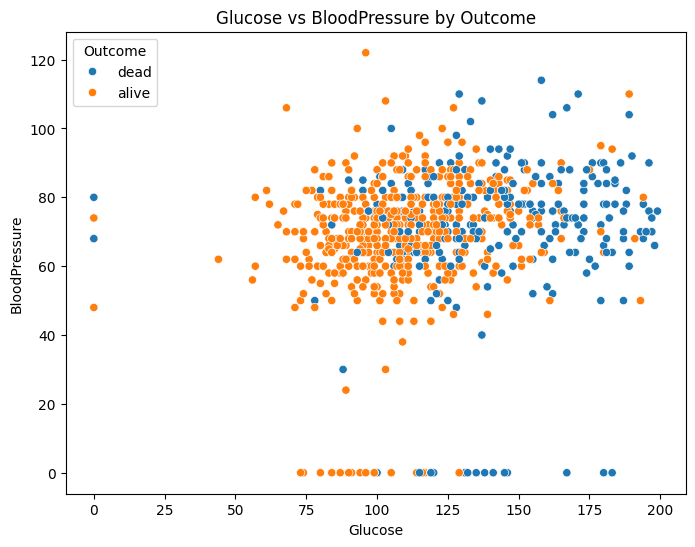

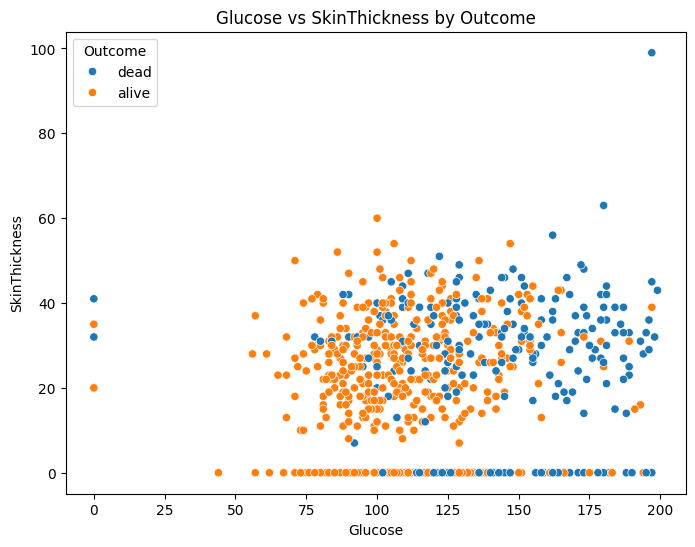

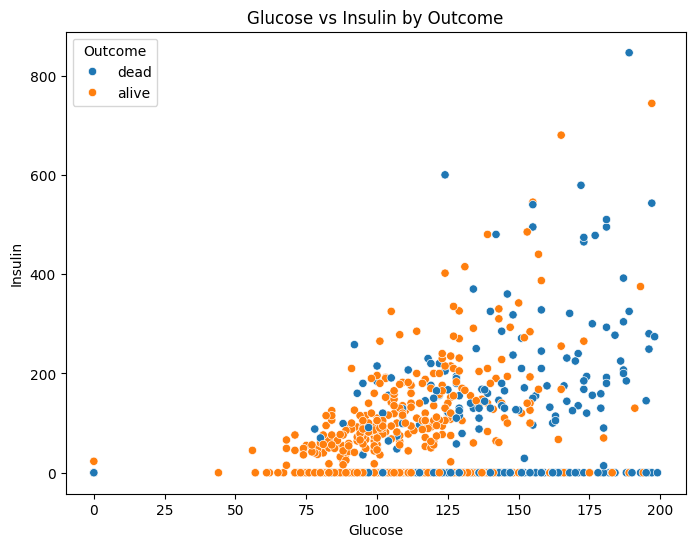

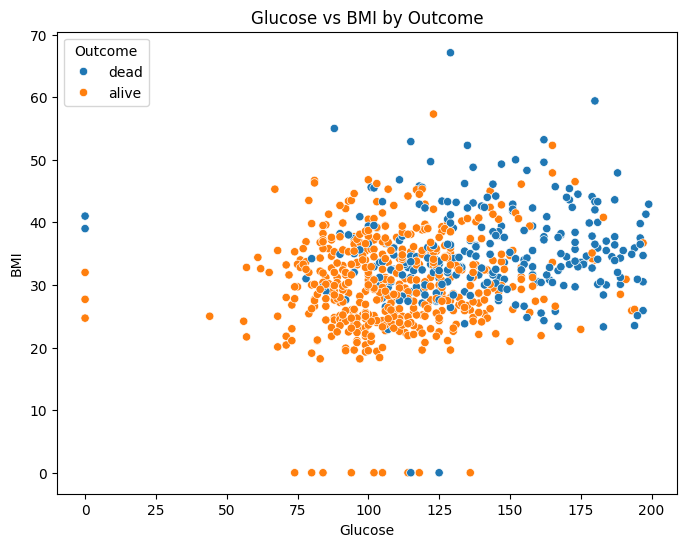

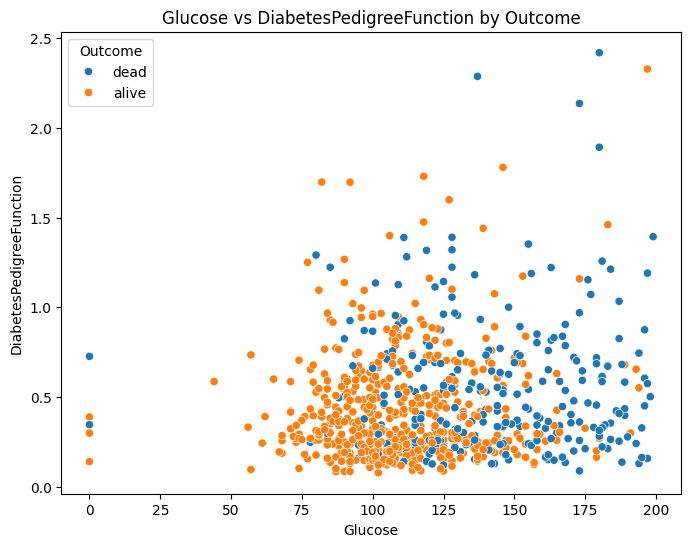

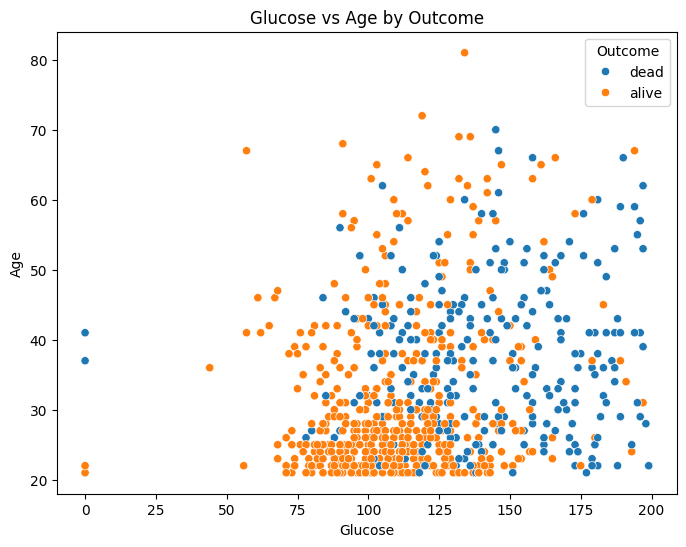

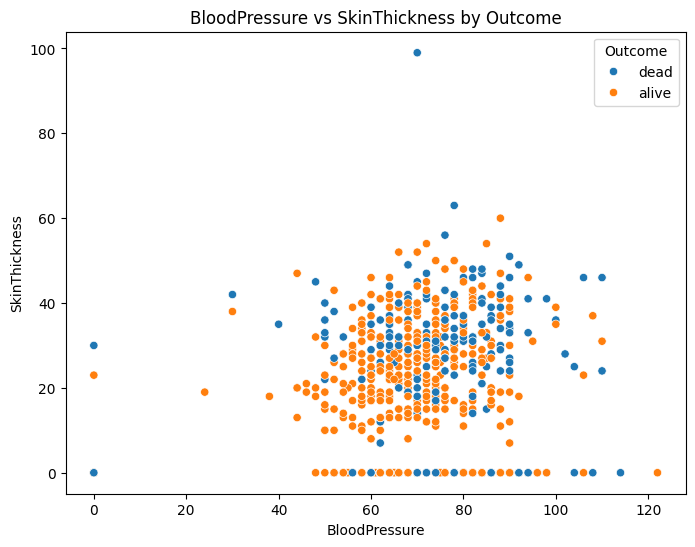

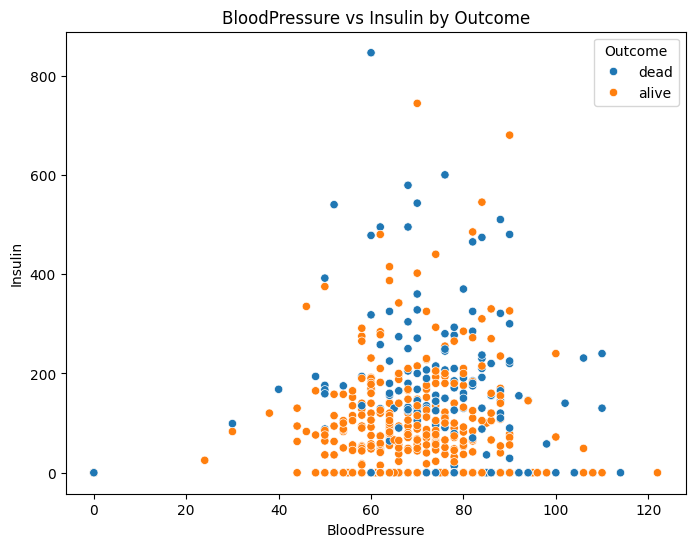

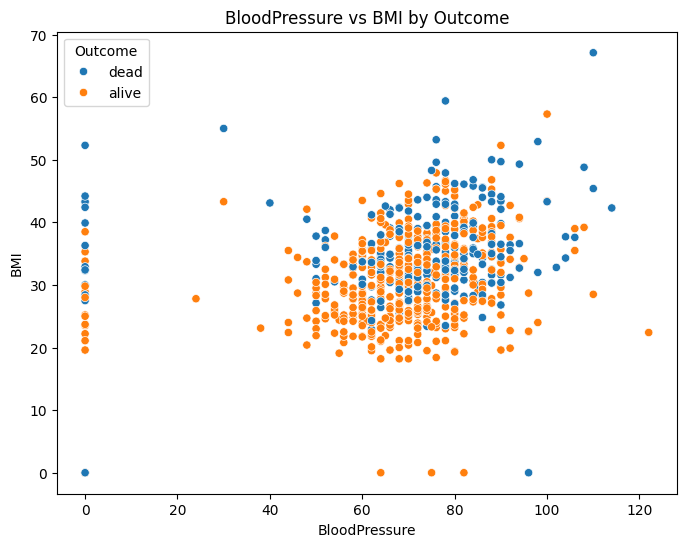

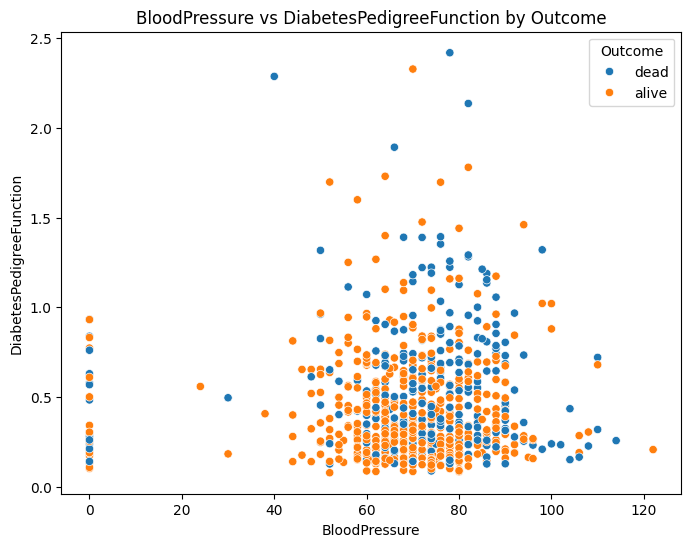

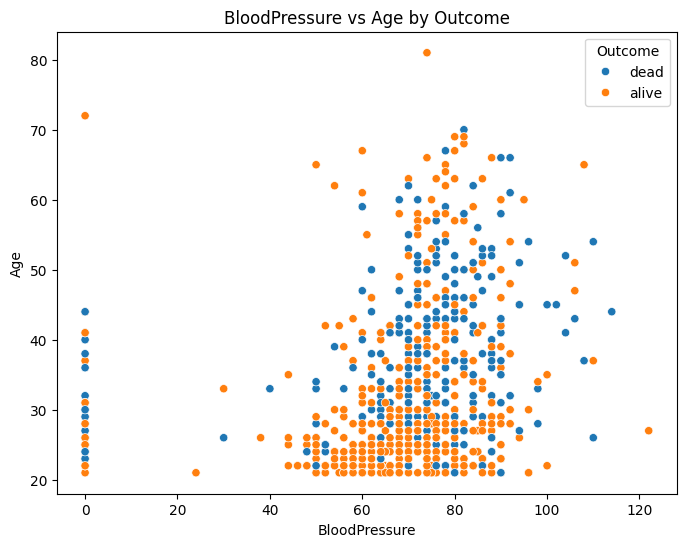

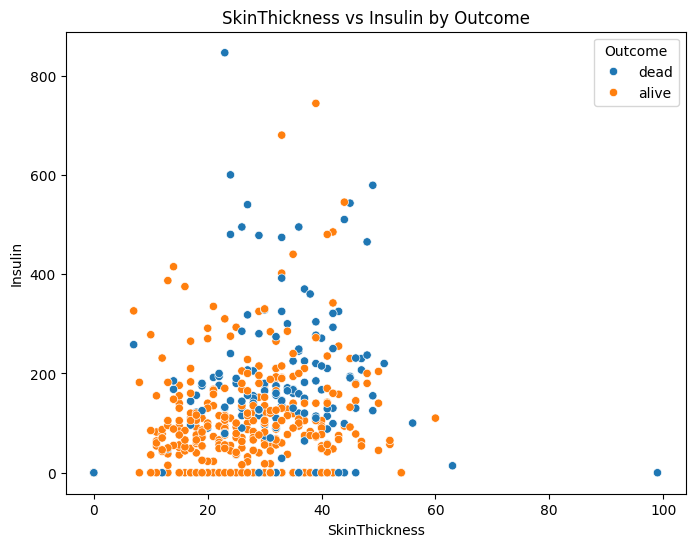

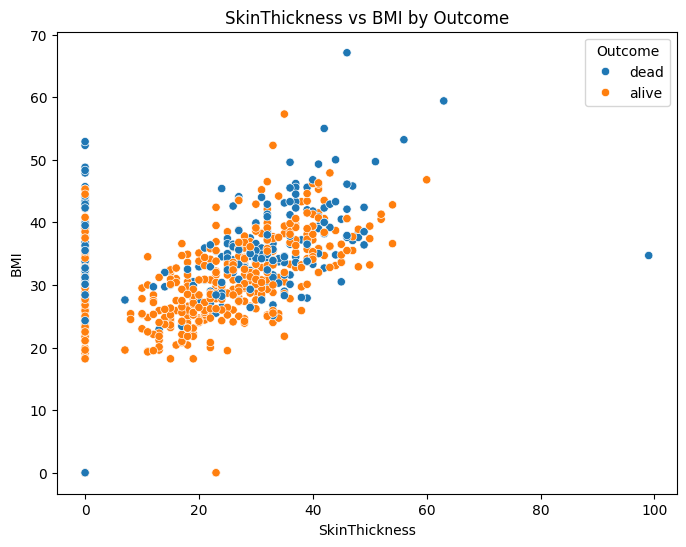

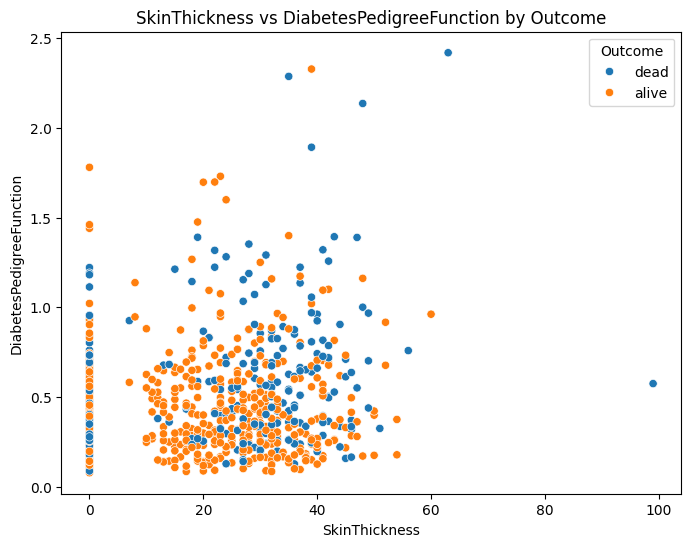

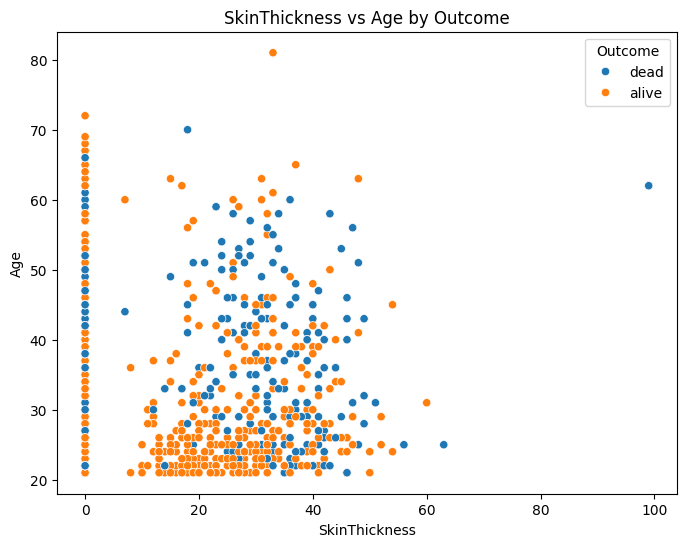

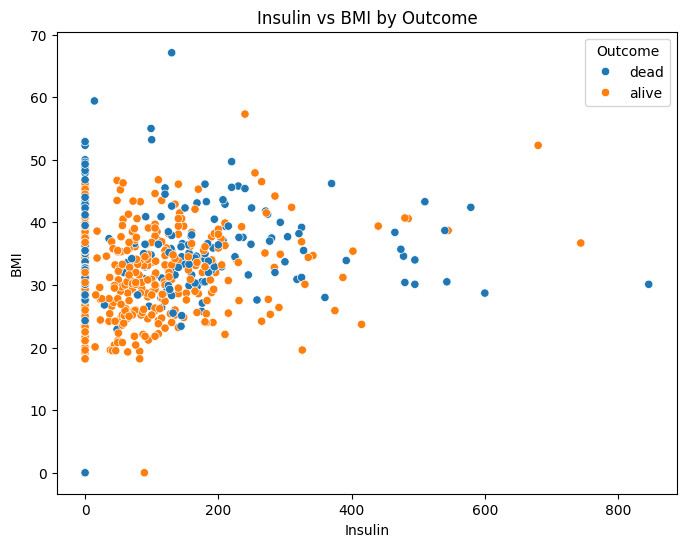

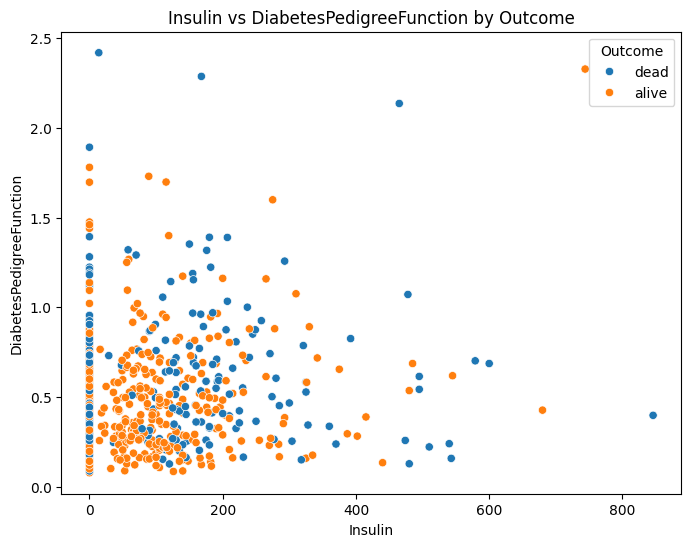

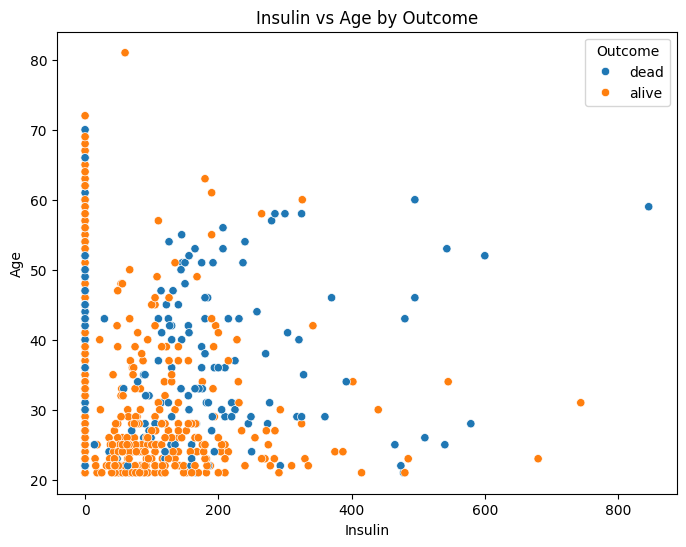

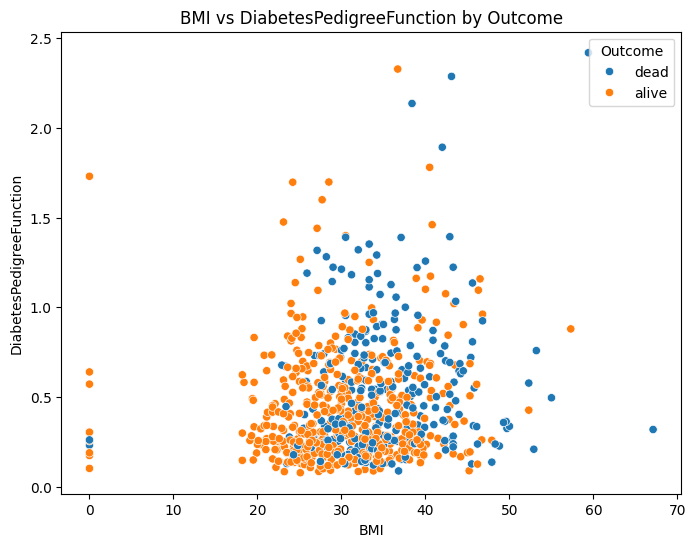

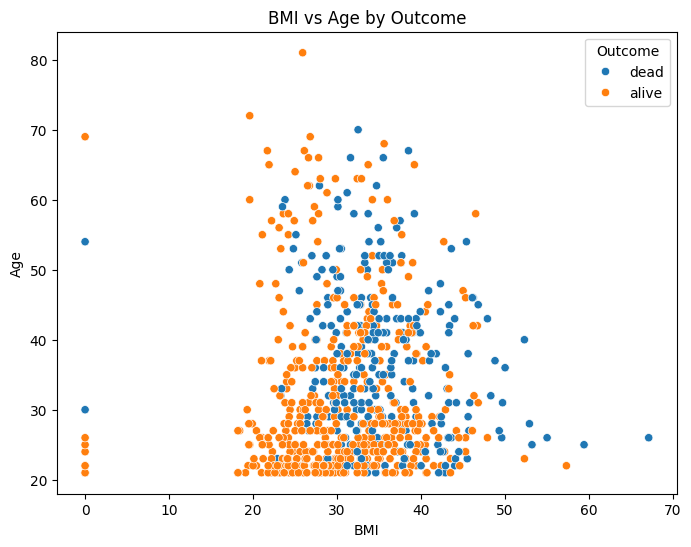

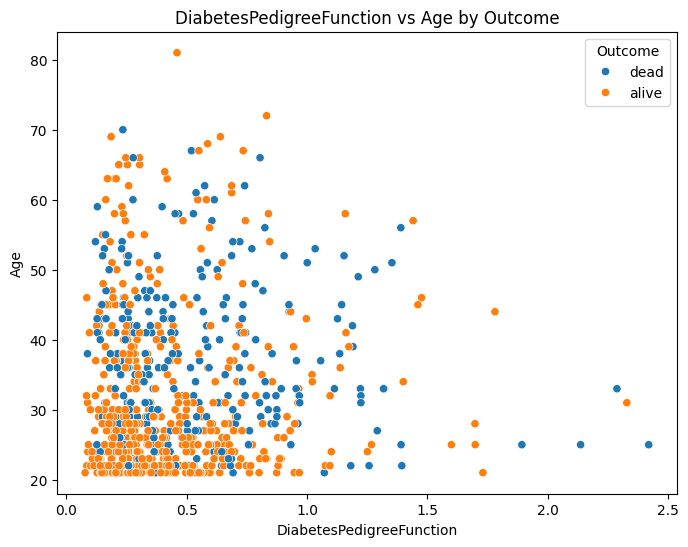

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

for feature1, feature2 in feature_combinations:
    plt.figure(figsize=(8, 6))
    sns.scatterplot(data=df, x=feature1, y=feature2, hue='Outcome')
    plt.title(f'{feature1} vs {feature2} by Outcome')
    plt.show()

Based on the plotted feature combinations, the combination of

**Glucose vs BMI**

appears to have the best potential to adequately separate the Outcome (dead and alive). We will consider SVM classification focusing on these two features.

But before that, let's clearn the data by removing rows where BMI or Glucose are zero, that seemingly outliers.

In [18]:
# Remove rows where BMI or Glucose are zero as outliers
df_filtered = df[(df['BMI'] != 0) & (df['Glucose'] != 0)].copy()

# Display the shape of the original and filtered DataFrames to show the removal
print(f"Original DataFrame shape: {df.shape}")
print(f"Filtered DataFrame shape: {df_filtered.shape}")

Original DataFrame shape: (768, 9)
Filtered DataFrame shape: (752, 9)


Now, let's plot `BMI x Glucose` again, with the data without outliers.

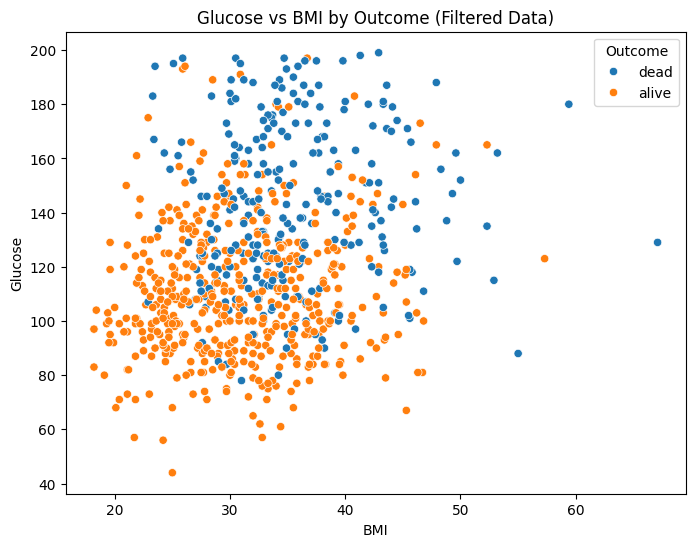

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_filtered, x='BMI', y='Glucose', hue='Outcome')
plt.title('Glucose vs BMI by Outcome (Filtered Data)')
plt.xlabel('BMI')
plt.ylabel('Glucose')
plt.show()

Next, visualize the decision boundary of a soft margin SVM classifier trained on the 'Glucose' and 'BMI' features of the `df_filtered` DataFrame, with 'Outcome' as the target variable.

Select 'Glucose' and 'BMI' as features and 'Outcome' as the target from the `df_filtered` DataFrame. Convert the 'Outcome' column to numerical labels (e.g., 0 for 'alive', 1 for 'dead').
Also, select the features and target variable and convert the target variable to numerical labels.

In [20]:
X = df_filtered[['Glucose', 'BMI']]
y = df_filtered['Outcome'].map({'alive': 0, 'dead': 1})

display(X.head())
display(y.head())

,Glucose,BMI
0,148,33.6
1,85,26.6
2,183,23.3
3,89,28.1
4,137,43.1


,Outcome
0,1
1,0
2,1
3,0
4,1


Split the data into training and testing sets. Using train_test_split with a test size of 0.2 and a random state of 42.

In [22]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Shape of X_train: {X_train.shape}")
print(f"Shape of X_test: {X_test.shape}")
print(f"Shape of y_train: {y_train.shape}")
print(f"Shape of y_test: {y_test.shape}")

Shape of X_train: (601, 2)
Shape of X_test: (151, 2)
Shape of y_train: (601,)
Shape of y_test: (151,)


# SVM

Based on our initial data exploration and visualization of feature combinations, the plot of 'Glucose' vs 'BMI' showed a promising, nearly linear separation between the 'alive' and 'dead' outcomes. This visual insight led us to initially choose a Support Vector Machine (SVM) model, particularly with a linear kernel.

SVMs are powerful algorithms that work well for classification tasks, and the linear kernel is a natural starting point when the data appears to be linearly separable. By starting with a linear SVM, we can establish a baseline performance and see how well a relatively simple model can classify the data based on the chosen features. This initial step allows us to validate our visual observations with a concrete modeling approach.

Plot the scatter plot of 'Glucose' vs 'BMI' for the test data, and overlay the decision boundary of the trained SVM model.


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


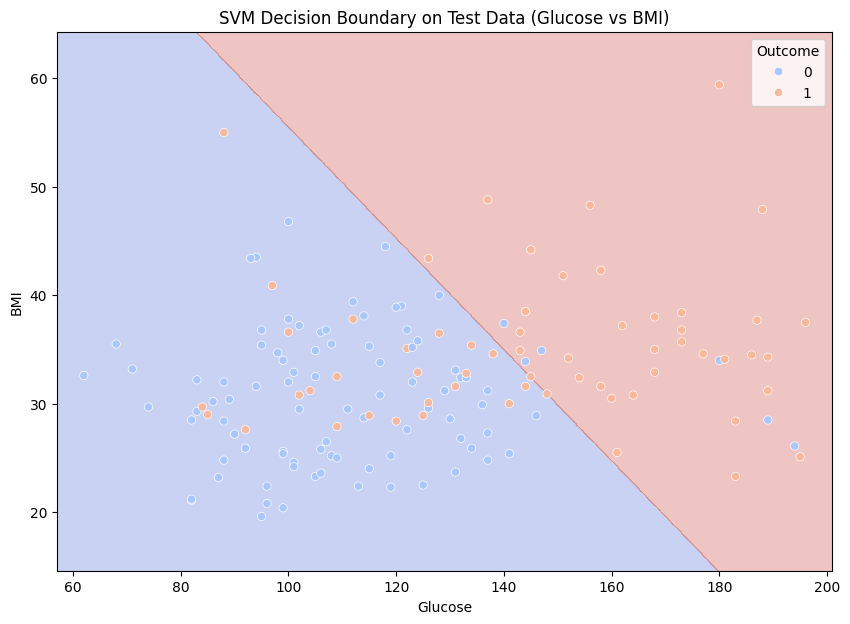

In [23]:
import numpy as np
from sklearn.svm import SVC

svm_model = SVC(kernel='linear', C=1.0)
svm_model.fit(X_train, y_train)

# Create a meshgrid of points
x_min, x_max = X_test['Glucose'].min() - 5, X_test['Glucose'].max() + 5
y_min, y_max = X_test['BMI'].min() - 5, X_test['BMI'].max() + 5
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

# Predict the outcome for each point in the meshgrid
Z = svm_model.predict(np.c_[xx.ravel(), yy.ravel()])

# Reshape the predictions to match the shape of the meshgrid
Z = Z.reshape(xx.shape)

# Create the scatter plot and overlay the decision boundary
plt.figure(figsize=(10, 7))
plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.coolwarm)
sns.scatterplot(data=X_test, x='Glucose', y='BMI', hue=y_test, palette='coolwarm', legend='full')
plt.title('SVM Decision Boundary on Test Data (Glucose vs BMI)')
plt.xlabel('Glucose')
plt.ylabel('BMI')
plt.show()

## Evaluate model

Evaluate the accuracy of the trained SVM model on the test data.

In [24]:
from sklearn.metrics import accuracy_score

# Use the X_test that was split using only 'Glucose' and 'BMI' features (from cell 03f2dae8)
y_pred = svm_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print(f"Accuracy of the SVM model on the test data: {accuracy:.2f}")

Accuracy of the SVM model on the test data: 0.80


## Findings

Training with a soft-margin Support Vector Machine (SVM) model, which utilized a `linear` kernel and a regularization parameter `C=1.0`, successfully created a decision boundary. This boundary effectively separates the 'alive' and 'dead' classes based on the 'Glucose' and 'BMI' values.

The model achieved an approximate accuracy of 0.8, and its decision boundary was correctly visualized on a scatter plot of the test data. This visualization clearly showed the separation between the two classes.

# Hyperparameter Tuning with GridSearchCV

While our initial models provided a baseline understanding of how well we can predict diabetes outcomes, to achieve the best possible performance, I'd like to fine-tune the model's hyperparameters. Hyperparameters are settings that are not learned from the data but are set before the training process begins (e.g., the regularization parameter 'C' in SVM, or the number of trees in a Random Forest).

Choosing the right combination of hyperparameters can largely impact a model's performance. Instead of trying out every possible combination manually, I would use `GridSearchCV` to automate the process of hyperparameter tuning. It works by:

1. Defining a grid of hyperparameter values that you want to explore.
2. Training and evaluating the model for every possible combination of hyperparameters in the grid.
3. Using cross-validation to get a robust estimate of the model's performance for each combination.
4. Identifying the combination of hyperparameters that yields the best performance based on a chosen scoring metric (e.g., accuracy).

By using `GridSearchCV`, we can systematically search for the optimal hyperparameters for our models.

## SVM hyperparameter tuning

In [25]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

# Load the dataset, then separate features and outcome
df = pd.read_csv('diabetes-vid.csv')
X = df.drop('Outcome', axis=1)
y = df['Outcome']

# Encode the target variable ('alive'/'dead') to 0s and 1s
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [15]:
############################################################
# NOTE: this cell will take some time (~10min) to complete #
############################################################

from sklearn.model_selection import GridSearchCV

# Define the parameter grid to search
# We'll test different kernels and a range of C and gamma values.
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': [1, 0.1, 0.01, 0.001],
    'kernel': ['rbf', 'poly', 'linear']
}

# Create a GridSearchCV object
# cv=5 means 5-fold cross-validation
grid = GridSearchCV(SVC(), param_grid, refit=True, verbose=2, cv=5)

# Fit the model to the data
grid.fit(X_train_scaled, y_train)

# Print the best parameters and the best score
print("The best parameters are: ", grid.best_params_)
print("The best score is: ", grid.best_score_)

Fitting 5 folds for each of 48 candidates, totalling 240 fits
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.1s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.0s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.1s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.1s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.1s
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ......................C=0.1, gamma=1, 

In [16]:
from sklearn.metrics import accuracy_score

# Get the best model from the grid search
best_svm = grid.best_estimator_

# Make predictions on the test data
y_pred = best_svm.predict(X_test_scaled)

# Calculate and print the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy on the test set: {accuracy:.2f}")

Accuracy on the test set: 0.77


## Random Forest

While the SVM model, particularly with the linear kernel, showed promising results, I decided to explore Random Forest, which works by building multiple decision trees and combining their predictions. This approach can often capture complex non-linear relationships in the data and can be more robust to outliers than some other algorithms. By introducing Random Forest, I'm trying to:

1. Compare Performance: See if a more complex, non-linear model can outperform the linear SVM on this dataset.
2. Gain Further Insights: Analyze the feature importances from the Random Forest to understand which features it considers most relevant for predicting the outcome.

This exploration helps us to ensure that we are selecting the most appropriate model for our specific problem and dataset.

In [13]:
########################################
# NOTE: this cell also takes some time #
########################################

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for the Random Forest
# This tells GridSearchCV which settings to try
param_grid_rf = {
    'n_estimators': [100, 200, 300],  # The number of trees in the forest
    'max_depth': [10, 20, 30],        # The maximum depth of each tree
    'min_samples_leaf': [1, 2, 4],    # The minimum number of samples required to be at a leaf node
    'max_features': ['sqrt', 'log2']  # The number of features to consider when looking for the best split
}

# Create a GridSearchCV object for Random Forest
# We are looking for the best RandomForestClassifier, using 5-fold cross-validation
grid_rf = GridSearchCV(
    RandomForestClassifier(random_state=42),
    param_grid=param_grid_rf,
    cv=5, # 5-fold cross-validation
    verbose=2,
    n_jobs=-1 # Use all available CPU cores to speed up the process
)

# Fit the grid search to the data, training different random forests to find the best one
print("Starting the grid search for the best Random Forest model...")
grid_rf.fit(X_train_scaled, y_train)

# --- After the grid search is complete ---

# Print the best parameters found
print("\nBest parameters for Random Forest:", grid_rf.best_params_)

# Print the best cross-validated score
print("Best cross-validated score for Random Forest:", grid_rf.best_score_)

# Now, let's see how the best model performs on the unseen test data
from sklearn.metrics import accuracy_score

best_rf_model = grid_rf.best_estimator_
y_pred_test = best_rf_model.predict(X_test_scaled)
test_accuracy = accuracy_score(y_test, y_pred_test)

print(f"Accuracy of the best model on the test set: {test_accuracy:.4f}")

Starting the grid search for the best Random Forest model...
Fitting 5 folds for each of 54 candidates, totalling 270 fits

Best parameters for Random Forest: {'max_depth': 10, 'max_features': 'log2', 'min_samples_leaf': 2, 'n_estimators': 100}
Best cross-validated score for Random Forest: 0.7882980141276823
Accuracy of the best model on the test set: 0.7597


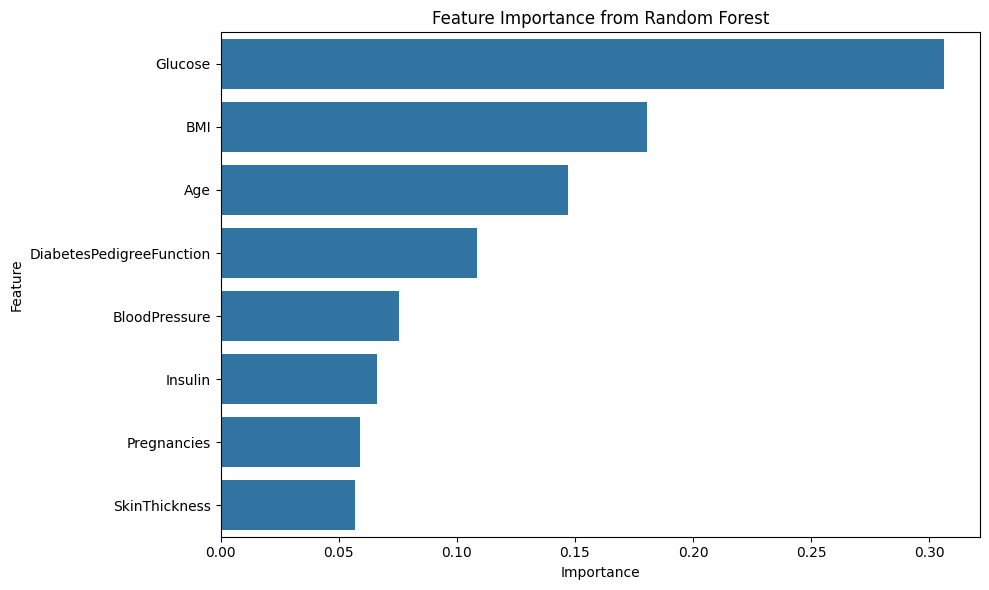

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Get the best trained Random Forest model from your grid search
best_rf_model = grid_rf.best_estimator_

# Get feature importances
importances = best_rf_model.feature_importances_
feature_names = X.columns

# Create a DataFrame for visualization
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})

# Sort the DataFrame by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot the feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importance from Random Forest')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.tight_layout()
plt.savefig('feature_importance.png')
plt.show()

# Conclusion

The most important takeaway is that for this dataset, a simple linear model is surprisingly effective. Based on the results, the more complex, tuned models did not manage to outperform the score achieved by the simple linear SVM on the initial test set. It means that adding complexity with non-linear kernels (like `rbf`) or powerful ensemble models (like Random Forest) did not provide a significant benefit. This tells us that the relationship between the features and the outcome can be approximated well by a straight line or a flat plane.

Also, it's crucial to distinguish between the two scores we're comparing:

- Linear SVM score (0.80) on one specific train/test split.
- Tuned model scores (~0.79) from GridSearchCV were produced by 5-fold cross-validation

The initial 80% score from the linear SVM was a good result, but the cross-validated score from the tuned Random Forest is a more trustworthy benchmark, because the model was trained and tested 5 different times on 5 different subsets of the data. This score is a much more robust and reliable estimate of how the model will perform on new, unseen data. Therefore, the generalizable performance of the best models for this dataset is likely around 79% accuracy.

We can conclude that the features in the Diabetes dataset have a strong linear relationship with the outcome. While a simple linear SVM achieved a high score on a single test set, a more rigorously tested Random Forest model provides a more reliable performance estimate of ~79%. Since adding complexity did not yield a notable improvement, a simple linear SVM remains the most practical and effective choice for this particular problem.

# References

Joakim Arvidsson. (2023). Diabetes Factors. Kaggle.com. https://www.kaggle.com/datasets/joebeachcapital/diabetes-factors